Load data and data cleaning

In [10]:
import re
import string
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/obama.csv", sep="|")
data =  data.dropna()
# Pre-processing
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('[\d\n]', ' ', text)
    return text
round1 = lambda x: clean_text(x).strip()
data_clean = data
data_clean['content'] = data.content.apply(round1)
data_clean.head(3)


,Unnamed: 0,Unnamed: 0.1,title,year,content
0,0,0,FIRST PRESIDENTIAL INAUGURAL ADDRESS,2009-01-20,oath office solemnly swear execute office pres...
1,1,1,First Presidential Weekly Speech,2009-01-24,nted action week saw people file unemployment ...
2,2,2,Al-Arabiya Television Interview,2009-01-26,directly audio president thank opportunity rea...


Data engineering : Term-Document Matrix

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
data_cv = cv.fit_transform(data_clean.content)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean[['year','title']].apply(lambda x: ':'.join(str(s) for s in x), axis=1)
data_dtm.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,abandon,abandoned,abatement,abbas,abdication,abduction,aberration,abet,abeyance,...,zag,zapatero,zeal,zero,zig,zimbabwe,zip,zone,ºhistory,ºjust
2009-01-20:FIRST PRESIDENTIAL INAUGURAL ADDRESS,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-01-24:First Presidential Weekly Speech,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-01-26:Al-Arabiya Television Interview,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-02-04:Executive Compensation Salary Cap Speech,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-02-09:First Prime Time Press Conference,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


Exploratory data analysis
transpose matrix to have words in rows instead of columns.

In [12]:
data = data_dtm.transpose()
data.head()

,2009-01-20:FIRST PRESIDENTIAL INAUGURAL ADDRESS,2009-01-24:First Presidential Weekly Speech,2009-01-26:Al-Arabiya Television Interview,2009-02-04:Executive Compensation Salary Cap Speech,2009-02-09:First Prime Time Press Conference,2009-02-12:Abraham Lincoln D.C. Bicentennial Celebration Speech,2009-02-12:Lincoln Association 102nd Birthday Banquet Speech,2009-02-24:State of the Nation Address to Congress Speech,2009-02-27:Ending the Iraq War at Camp Lejeune Speech,2009-03-10:Speech to Hispanic Chamber of Commerce,...,2016-12-06:On the Administration's Approach to Counterterrorism,2016-12-16:Final Presidential Press Conference of Year,2016-12-27:Address at Pearl Harbor,2016-12-04:Farewell Address to the U.S. Armed Forces,2017-01-06:VOX Live Interview at the Blair House,2017-01-10:Presidential Farewell Address,2017-01-12:Joe Biden Medal of Freedom Presentation Address,2017-01-14:Final Presidential Weekly Address,2017-01-16:MLB World Series Champion Chicago Cubs WH Visit,2017-01-18:Final Presidential Press Conference
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandon,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
abandoned,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abatement,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abbas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Calculating word frequency

In [13]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c] = list(zip(top.index, top.values))

Print out the top 15 words used in each speech using the following code

In [14]:
for title, top_words in top_dict.items():
    print(title)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

2009-01-20:FIRST PRESIDENTIAL INAUGURAL ADDRESS
nation, new, oath, people, world, let, today, time, work, god, common, child, know, office
---
2009-01-24:First Presidential Weekly Speech
million, new, energy, health, work, plan, act, care, invest, short, millions, college, economy, like
---
2009-01-26:Al-Arabiya Television Interview
going, think, people, world, want, make, united, region, important, time, peace, know, look, like
---
2009-02-04:Executive Compensation Salary Cap Speech
crisis, people, economic, financial, compensation, recovery, going, country, strategy, term, restore, make, plan, time
---
2009-02-09:First Prime Time Press Conference
going, think, people, right, know, make, president, want, money, got, said, start, sure, economy
---
2009-02-12:Abraham Lincoln D.C. Bicentennial Celebration Speech
nation, today, war, day, president, people, work, building, despite, kept, ways, south, future, debating
---
2009-02-12:Lincoln Association 102nd Birthday Banquet Speech
people, 

Identify the top words that were used in multiple speeches.

In [15]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter
# The top 10 most recurrent words in our speeches
words = []
for president in data.columns:
    top = [word for (word,count) in top_dict[president]]
    for t in top:
        words.append(t)
# List aggregation
Counter(words).most_common(10)

[('people', 313),
 ('make', 225),
 ('time', 206),
 ('know', 205),
 ('like', 201),
 ('work', 184),
 ('world', 183),
 ('want', 183),
 ('going', 175),
 ('today', 173)]

Take out these common words

In [78]:
# If more than 1/3 the speeches have it as a top word, exclude it  from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > len(data.columns)/3]
add_stop_words

['people',
 'make',
 'time',
 'know',
 'like',
 'work',
 'world',
 'want',
 'going',
 'today',
 'country',
 'new',
 'united',
 'right',
 'president',
 'think']

 Visualizing data

In [79]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.content)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean[['year','title']].apply(lambda x: ':'.join(str(s) for s in x), axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


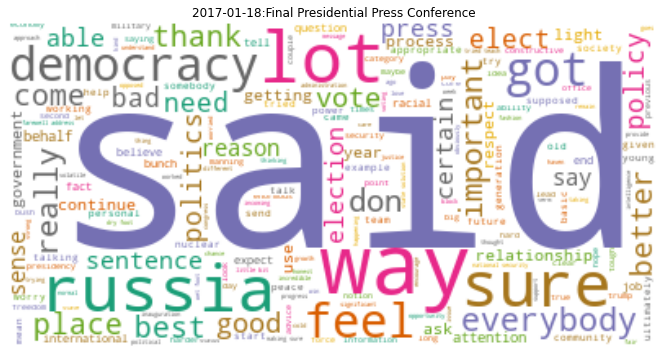

In [91]:
from wordcloud import WordCloud
wc = WordCloud(stopwords=stop_words, background_color='white', colormap='Dark2', max_font_size=150, random_state=42)
data_clean.index = data_clean[['year','title']].apply(lambda x: ':'.join(str(s) for s in x), axis=1)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 6]
title_names = data.columns
# Create subplots for each speech
for index, speech in enumerate(data.columns):
    
    if index > 10:
        wc.generate(data_clean.content[speech])
#plt.subplot(4, 3, 10)
plt.imshow( wc, interpolation='bilinear')
plt.axis("off")
plt.title(title_names[index])
plt.show()

Counting the number of unique words per speech.

In [84]:
# Words counting
unique_list = []
for speech in data.columns:
    uniques = data[speech].to_numpy().nonzero()[0].size
    unique_list.append(uniques)
# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(data.columns, unique_list)), columns=['speech', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words', ascending=False)
data_words

,speech,unique_words
0,2009-01-20:FIRST PRESIDENTIAL INAUGURAL ADDRESS,607
1,2009-01-24:First Presidential Weekly Speech,210
2,2009-01-26:Al-Arabiya Television Interview,356
3,2009-02-04:Executive Compensation Salary Cap S...,244
4,2009-02-09:First Prime Time Press Conference,1013
...,...,...
347,2017-01-10:Presidential Farewell Address,882
348,2017-01-12:Joe Biden Medal of Freedom Presenta...,442
349,2017-01-14:Final Presidential Weekly Address,119
350,2017-01-16:MLB World Series Champion Chicago C...,387


Model generation : Topic Modeling

In [85]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

‘NN’ four nouns;
‘JJ’ for adjectives;
‘CC’ for coordinating conjunctions;
‘RB’ for adverbs;
‘IN’ for prepositions;

In [86]:
from nltk import word_tokenize, pos_tag
def nouns_adjs(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    all_nouns_adjs = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)]
    return ' '.join(all_nouns_adjs)
# Apply the nouns function to the transcripts to filter only on nouns and adjectives
data_nouns_adjs = pd.DataFrame(data_clean.content.apply(nouns_adjs))
data_nouns_adjs.head()

,content
2009-01-20:FIRST PRESIDENTIAL INAUGURAL ADDRESS,oath office execute office president best abil...
2009-01-24:First Presidential Weekly Speech,action week people file unemployment time last...
2009-01-26:Al-Arabiya Television Interview,audio president thank opportunity appreciate s...
2009-02-04:Executive Compensation Salary Cap Speech,recovery economic crisis face lifetime crisis ...
2009-02-09:First Prime Time Press Conference,good evening everybody please tonight speak br...


Reconstruct our document-term matrix :

In [50]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
# Re-add the additional stop words since we are recreating the document-term matrix
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
# Recreate a document-term matrix with nouns and adjectives
cvna = CountVectorizer(stop_words=stop_words)
data_cvna = cvna.fit_transform(data_nouns_adjs.content)
data_dtmna  = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adjs.index
data_dtmna.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,abandon,abatement,abbas,abdication,abduction,aberration,abet,abeyance,abhor,...,zag,zapatero,zeal,zero,zig,zimbabwe,zip,zone,ºhistory,ºjust
2009-01-20:FIRST PRESIDENTIAL INAUGURAL ADDRESS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-01-24:First Presidential Weekly Speech,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-01-26:Al-Arabiya Television Interview,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-02-04:Executive Compensation Salary Cap Speech,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-02-09:First Prime Time Press Conference,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [87]:
# Create the gensim corpus
from gensim import matutils, models
import scipy.sparse
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))
# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [98]:
ldana = models.LdaModel(corpus=corpusna, num_topics =5 , id2word=id2wordna, passes=20)
ldana.save('mode1.gensim')
ldana.print_topics()

[(0,
  '0.025*"gun" + 0.012*"law" + 0.009*"violence" + 0.009*"country" + 0.008*"way" + 0.008*"president" + 0.007*"today" + 0.007*"immigration" + 0.007*"congress" + 0.006*"right"'),
 (1,
  '0.021*"president" + 0.012*"sure" + 0.009*"way" + 0.008*"question" + 0.008*"right" + 0.007*"good" + 0.007*"important" + 0.007*"lot" + 0.007*"country" + 0.006*"government"'),
 (2,
  '0.019*"health" + 0.017*"care" + 0.013*"insurance" + 0.011*"new" + 0.010*"economy" + 0.008*"way" + 0.008*"tax" + 0.008*"president" + 0.008*"year" + 0.007*"country"'),
 (3,
  '0.012*"security" + 0.012*"united" + 0.010*"war" + 0.009*"today" + 0.009*"nuclear" + 0.008*"new" + 0.008*"president" + 0.007*"peace" + 0.007*"country" + 0.007*"military"'),
 (4,
  '0.010*"today" + 0.009*"young" + 0.009*"country" + 0.008*"life" + 0.007*"new" + 0.007*"day" + 0.006*"good" + 0.006*"great" + 0.006*"men" + 0.006*"nation"')]

We can interprete the 5 topics as follows :
1. Topic 1 : Gun contral 
2. Topic 2 : Victory speeches 
3. Topic 3 : Affordable care act
4. Topic 4 : Nobel Peace Prize 
5. Topic 5 : The national union

Identify which topics are discussed in each document

In [99]:
# Let's take a look at which topics each speech contains
corpus_transformed = ldana[corpusna]
# 1: Sorting topics for each speech
sorted_corpus_transformed = [sorted(a, key=lambda x: x[1], reverse=True) for a in corpus_transformed]
[a for a in enumerate(corpus_transformed)]
# 2: Matching topics to speeches
topics = list(zip(data_dtmna.index,
                  [c[0][0] for c in sorted_corpus_transformed],
                  [c[1][0] if len(c)>1 else -1 for c in sorted_corpus_transformed],
                  [c[2][0] if len(c)>2 else -1 for c in sorted_corpus_transformed],
                  [c[3][0] if len(c)>3 else -1 for c in sorted_corpus_transformed],
                  [c[4][0] if len(c)>4 else -1 for c in sorted_corpus_transformed]
                  ))
# 3: Saving the result in a DataFrame
df = pd.DataFrame(topics, columns = ['speech', 'topic 1', 'topic 2', 'topic 3','topic 4', 'topic 5'])
df.head(50)

,speech,topic 1,topic 2,topic 3,topic 4,topic 5
0,2009-01-20:FIRST PRESIDENTIAL INAUGURAL ADDRESS,4,3,2,-1,-1
1,2009-01-24:First Presidential Weekly Speech,2,-1,-1,-1,-1
2,2009-01-26:Al-Arabiya Television Interview,3,1,0,-1,-1
3,2009-02-04:Executive Compensation Salary Cap S...,2,3,-1,-1,-1
4,2009-02-09:First Prime Time Press Conference,2,1,3,-1,-1
5,2009-02-12:Abraham Lincoln D.C. Bicentennial C...,4,3,-1,-1,-1
6,2009-02-12:Lincoln Association 102nd Birthday ...,4,2,-1,-1,-1
7,2009-02-24:State of the Nation Address to Cong...,2,3,4,-1,-1
8,2009-02-27:Ending the Iraq War at Camp Lejeune...,3,-1,-1,-1,-1
9,2009-03-10:Speech to Hispanic Chamber of Commerce,2,4,-1,-1,-1


Dataframe with the weights

In [100]:
# Including probabilities
w_topic1 = [c[0][1] if c[0][0] == 0 else c[1][1] if (len(c)>1 and c[1][0] == 0) else c[2][1] if ( len(c)>2 and c[2][0] == 0) else 0 for c in sorted_corpus_transformed]
w_topic2 = [c[0][1] if c[0][0] == 1 else c[1][1] if (len(c)>1 and c[1][0] == 1) else c[2][1] if (len(c)>2 and c[2][0] == 1) else 0 for c in sorted_corpus_transformed]
w_topic3 = [c[0][1] if c[0][0] == 2 else c[1][1] if (len(c)>1 and c[1][0] == 2) else c[2][1] if (len(c)>2 and c[2][0] == 2) else 0 for c in sorted_corpus_transformed]
w_topic4 = [c[0][1] if c[0][0] == 3 else c[1][1] if (len(c)>1 and c[1][0] == 3) else c[2][1] if (len(c)>2 and c[2][0] == 3) else 0 for c in sorted_corpus_transformed]
w_topic5 = [c[0][1] if c[0][0] == 4 else c[1][1] if (len(c)>1 and c[1][0] == 4) else c[2][1] if (len(c)>2 and c[2][0] == 4) else 0 for c in sorted_corpus_transformed]
p_topics = list(zip(data_dtmna.index, w_topic1, w_topic2, w_topic3, w_topic4, w_topic5))
p_df = pd.DataFrame(p_topics, columns = ['speech', 'topic1', 'topic2', 'topic3','topic4', 'topic5'])
p_df.head(20)

,speech,topic1,topic2,topic3,topic4,topic5
0,2009-01-20:FIRST PRESIDENTIAL INAUGURAL ADDRESS,0.00000,0.000000,0.064030,0.141007,0.794310
1,2009-01-24:First Presidential Weekly Speech,0.00000,0.000000,0.995989,0.000000,0.000000
2,2009-01-26:Al-Arabiya Television Interview,0.07151,0.287197,0.000000,0.638513,0.000000
3,2009-02-04:Executive Compensation Salary Cap S...,0.00000,0.000000,0.920287,0.077328,0.000000
4,2009-02-09:First Prime Time Press Conference,0.00000,0.268690,0.670325,0.060765,0.000000
5,2009-02-12:Abraham Lincoln D.C. Bicentennial C...,0.00000,0.000000,0.000000,0.427947,0.568208
6,2009-02-12:Lincoln Association 102nd Birthday ...,0.00000,0.000000,0.227898,0.000000,0.770721
7,2009-02-24:State of the Nation Address to Cong...,0.00000,0.000000,0.839344,0.147447,0.012922
8,2009-02-27:Ending the Iraq War at Camp Lejeune...,0.00000,0.000000,0.000000,0.998945,0.000000
9,2009-03-10:Speech to Hispanic Chamber of Commerce,0.00000,0.000000,0.751590,0.000000,0.247854


In [101]:
pip install pyLDAvis==2.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.1 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=18aa1deb6b3c6f8afbd5f658e9399e9ab82178e652138968b8475a62f256037c
  Stored in directory: /root/.cache/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
Successfully built pyLDAvis


In [105]:
pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [109]:
pip install pyLDAvis==2.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


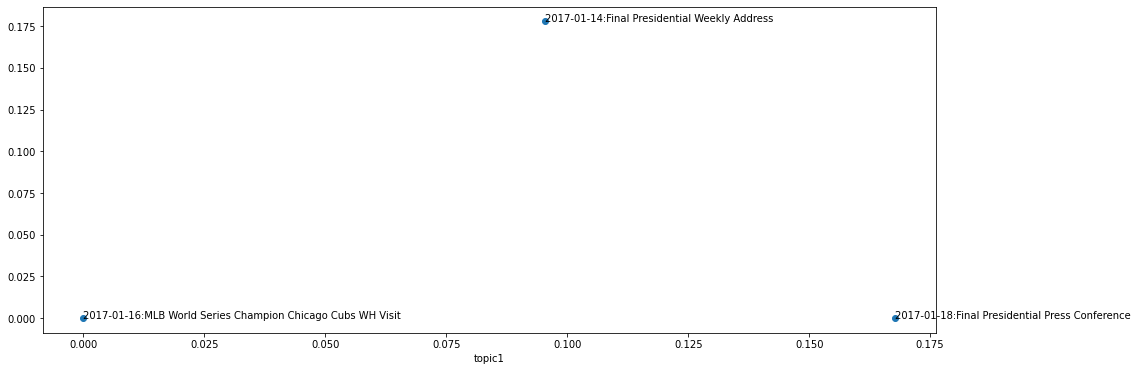

In [71]:
from matplotlib.pyplot import draw
# We visualize the last three inaugural speeches
p_df12 = p_df[-3:]
ax12 = p_df12.set_index('topic1')['topic2'].plot(style='o')
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))
label_point(p_df12['topic1'], p_df12['topic2'], p_df12['speech'], ax12)
draw()

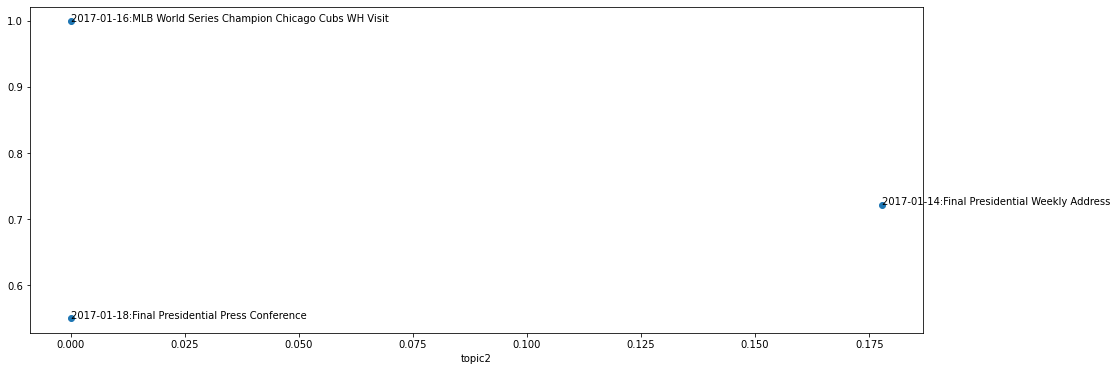

In [73]:
p_df23 = p_df[-3:]
ax23 = p_df23.set_index('topic2')['topic3'].plot(style='o')
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))
label_point(p_df23['topic2'], p_df23['topic3'], p_df23['speech'], ax23)
draw()

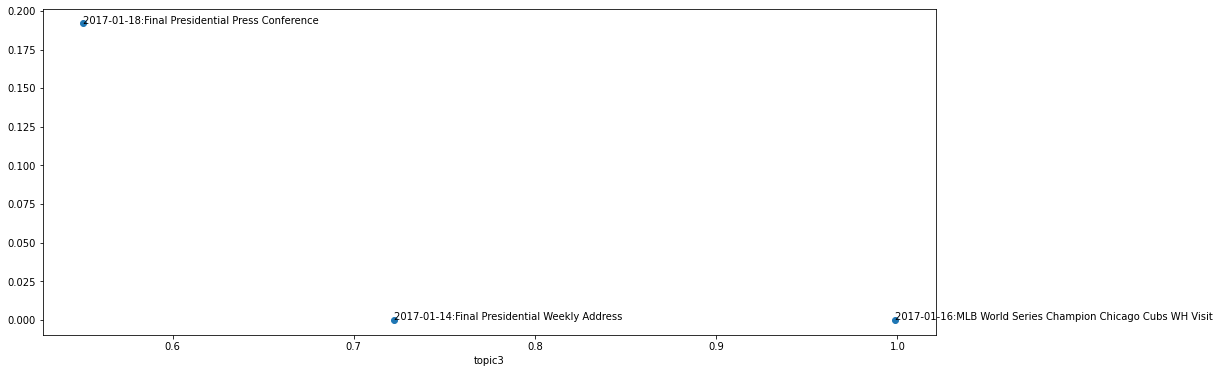

In [72]:
p_df23 = p_df[-3:]
ax23 = p_df23.set_index('topic3')['topic4'].plot(style='o')
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))
label_point(p_df23['topic3'], p_df23['topic4'], p_df23['speech'], ax23)
draw()